In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
from nltk.corpus import stopwords
import numpy as np
import seaborn as sns
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Dataset Info**

In [2]:
# Load the dataset
df = pd.read_csv('LearningQ.csv',engine='python',error_bad_lines=False)
# Dataset shape
print('Shape of dataset:', df.shape)

# Dataset info
print('\nDataset Info:\n', df.info())

# Missing values
print('\nMissing Values:\n', df.isnull().sum())

# Other statistics
print('\nDataset Statistics:\n', df.describe())

<ipython-input-2-1dd0b5f78247>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('LearningQ.csv',engine='python',error_bad_lines=False)


Shape of dataset: (161667, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161667 entries, 0 to 161666
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   context   161667 non-null  object
 1   question  161667 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB

Dataset Info:
 None

Missing Values:
 context     0
question    0
dtype: int64

Dataset Statistics:
                                                   context  \
count                                              161667   
unique                                              75203   
top     and i didn't want to make it that thick . a vi...   
freq                                                  135   

                                          question  
count                                       161667  
unique                                      158509  
top     how do you find the area of a triangle ?\n  
freq                                        

# **Length distribution**

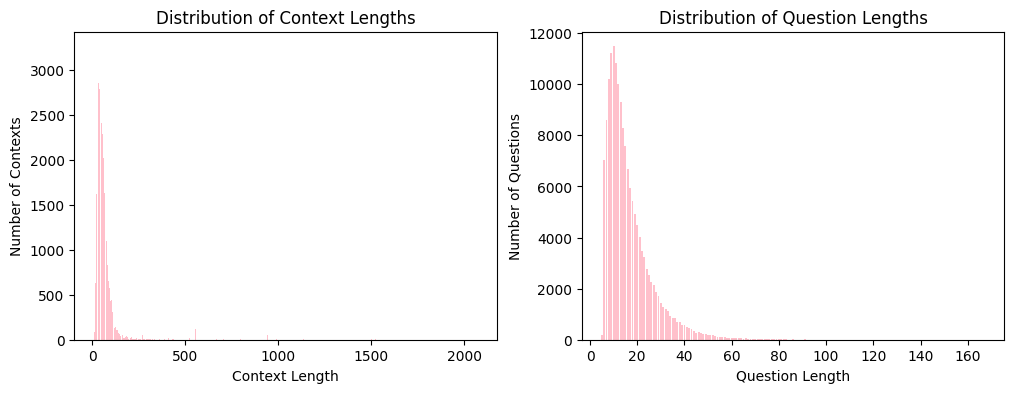

In [3]:

# count the number of contexts for each length
context_lengths = [len(c.split()) for c in df['context']]
length_counts = {}
for length in context_lengths:
    if length in length_counts:
        length_counts[length] += 1
    else:
        length_counts[length] = 1

#first subplot for question length distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.bar(length_counts.keys(), length_counts.values(), color='pink')
ax1.set_xlabel('Context Length')
ax1.set_ylabel('Number of Contexts')
ax1.set_title('Distribution of Context Lengths')

# count the number of questions for each length
question_lengths = [len(q.split()) for q in df['question']]
length_counts = {}
for length in question_lengths:
    if length in length_counts:
        length_counts[length] += 1
    else:
        length_counts[length] = 1

#second subplot for context length distribution
ax2.bar(length_counts.keys(), length_counts.values(), color='pink')
ax2.set_xlabel('Question Length')
ax2.set_ylabel('Number of Questions')
ax2.set_title('Distribution of Question Lengths')

plt.show()

# **Top 10 question words**

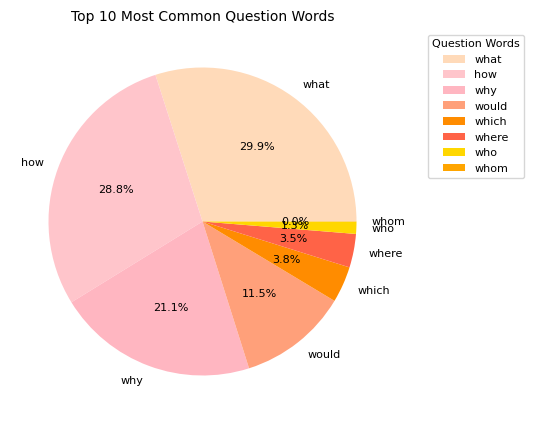

In [4]:
# lower case conversion
def lower_text(text):
    text = text.lower()
    return ' '.join(text.split())

# convert questions to lowercase
questions = df['question'].apply(lower_text)
# concatenate questions
all_questions = ' '.join(questions)

# define regex pattern to match question words
pattern = r'\b(?:how|what|why|who|where|would|whom|which)\b'
# find all question words and count frequencies
question_words = re.findall(pattern, all_questions)
question_word_counts = Counter(question_words)
# get the top 10 question words
top_question_words = dict(question_word_counts.most_common(10))


if not top_question_words:
    print("No question words found")
else:
    fig, ax = plt.subplots(figsize=(5,5))
    ax.pie(top_question_words.values(), labels=top_question_words.keys(), autopct='%1.1f%%', colors=['#FFDAB9', '#FFC5CB', '#FFB6C1', '#FFA07A', '#FF8C00', '#FF6347', '#FFD700', '#FFA500', '#FFFF00', '#ADFF2F'])
    ax.set_title('Top 10 Most Common Question Words', fontsize=10)
    ax.legend(title='Question Words', fontsize=8, loc='best', bbox_to_anchor=(0.85, 0.5, 0.5, 0.5))
    plt.setp(ax.get_legend().get_texts(), fontsize=8)
    plt.setp(ax.get_legend().get_title(), fontsize=8)
    plt.setp(ax.texts, size=8)
    plt.show()


# **Top 10 4-words sequences in questions**

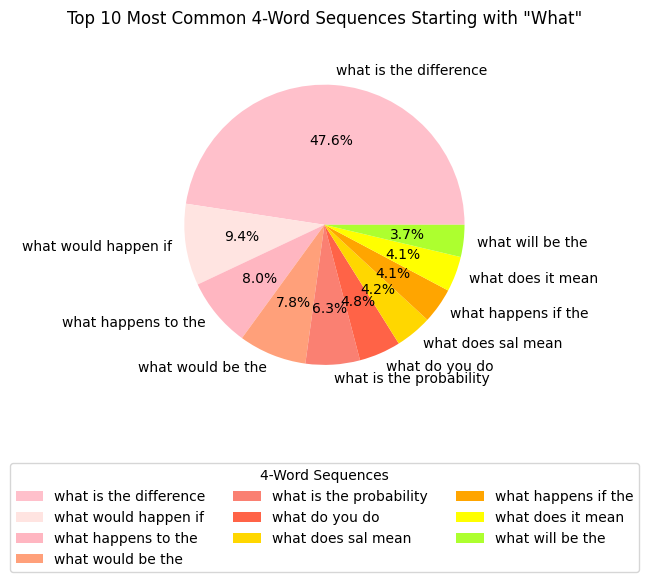

In [5]:
# regex pattern to match question phrases starting with "what"
pattern = r'\bwhat\s+\w+\s+\w+\s+\w+\b'
# find all question phrases starting with "what"
what_question_phrases = re.findall(pattern, all_questions)
# count frequencies of phrases
what_question_phrase_counts = Counter(what_question_phrases)
# get the top 10 phrases
top_what_question_phrases = dict(what_question_phrase_counts.most_common(10))

if not top_what_question_phrases:
    print("No question phrases found")
else:
    fig, ax = plt.subplots(figsize=(6,6))
    ax.pie(top_what_question_phrases.values(), labels=top_what_question_phrases.keys(), autopct='%1.1f%%', colors=['#FFC0CB', '#FFE4E1', '#FFB6C1', '#FFA07A', '#FA8072', '#FF6347', '#FFD700', '#FFA500', '#FFFF00', '#ADFF2F'])
    ax.set_title('Top 10 Most Common 4-Word Sequences Starting with "What"')
    ax.legend(title="4-Word Sequences", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3)
    ax.axis('equal')
    plt.tight_layout()
    plt.show()


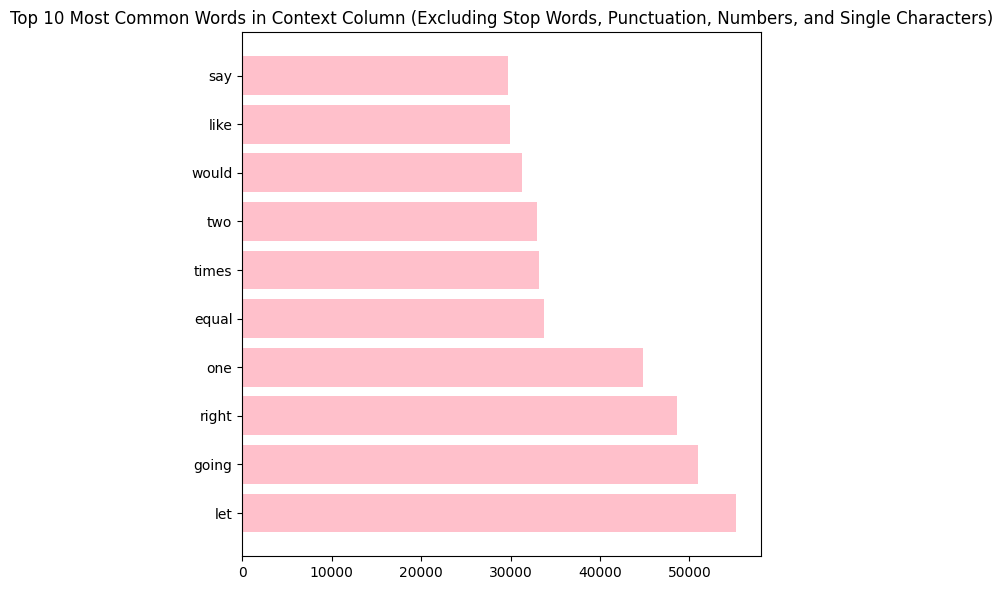

In [9]:
# convert contexts to lowercase
contexts = df['context'].apply(lower_text)
# concatenate all contexts 
all_contexts = ' '.join(contexts)

# define regex pattern to match words
pattern = r'\b[a-zA-Z]{2,}\b'
# find all words in the contexts
words = re.findall(pattern, all_contexts)
# remove stop words
stop_words = set(stopwords.words('english'))
word_list = [word for word in words if word not in stop_words]

# count the frequency of each word
word_counts = Counter(word_list)
# get the top 10 words
top_words = dict(word_counts.most_common(10))

if not top_words:
    print("No words found")
else:
    # create the bar chart
    fig, ax = plt.subplots(figsize=(6,6))
    ax.barh(list(top_words.keys()), list(top_words.values()), color='#FFC0CB')
    ax.set_title('Top 10 Most Common Words in Context Column (Excluding Stop Words, Punctuation, Numbers, and Single Characters)')
    plt.tight_layout()
    plt.show()
